Los siguientes datos corresponden al cálculo numérico de una cierta propiedad estadística de la distribución de materia en el universo (el espectro de potencias) $P(k)$ en función del modo de Fourier $k$. Use la derivada numérica para encontrar $d\ln P/d\ln k$ en cada punto. Para estimar el error cometido en esta derivada numérica compare el resultado de la fórmula a tres puntos con el resultado de la fórmula a cinco puntos. Será necesario usar las fórmulas a tres y cinco puntos en los extremos que se encuentran en este mismo notebook.

In [1]:
#Importamos librerías
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datos = np.array([[5.531683013105e-04,       1.070304113861e+12],
       [5.910227121702e-04,       1.139622191891e+12],
       [6.315688849627e-04,       1.213481232452e+12],
       [6.750065137883e-04,       1.292169597309e+12],
       [7.215301959429e-04,       1.375954296780e+12],
       [7.713235180257e-04,       1.465069697719e+12],
       [8.245525173319e-04,       1.559705507566e+12],
       [8.813589235833e-04,       1.659994890361e+12],
       [9.418537183337e-04,       1.766003776663e+12],
       [1.006111625261e-03,       1.877722471320e+12],
       [1.074167130425e-03,       1.995060685935e+12],
       [1.146012510269e-03,       2.117846703996e+12],
       [1.221598126720e-03,       2.245831037960e+12],
       [1.300834972303e-03,       2.378694410099e+12],
       [1.383599172303e-03,       2.516052095865e+12],
       [1.469737934874e-03,       2.657475892684e+12],
       [1.559076324033e-03,       2.802524407596e+12],
       [1.651424225675e-03,       2.950729179407e+12],
       [1.746582964833e-03,       3.101618970269e+12],
       [1.844351177716e-03,       3.254730780491e+12],
       [1.944529704896e-03,       3.409618695392e+12],
       [2.046925420592e-03,       3.565860320889e+12],
       [2.151354028418e-03,       3.723061333248e+12],
       [2.257641930146e-03,       3.880858018481e+12] ])

In [42]:
#Leemos los datos de la tabla por columna, y como necesitamos el logaritmo, se calcula.
P = np.log(datos[:, 0])
K = np.log(datos[:, 1])

In [70]:
#Derivada 3 puntos
def deriv3_datos(fxo, fx2, h):
    """Función que calcula la derivada dado 2 puntos 
    -----
    h = intervalo
    """
    return (fx2 - fxo)/(2*h)

#Derivada 3 puntos para los extremos
def deriv3_extremo(fxo, fx1, fx2, h):
    """Función que calcula la derivada en los extremos dado 3 puntos
    -----
    h = intervalo
    """
    return (-3*fxo + 4*fx1 - fx2)/(2*h)

#Derivada 5 puntos
def deriv5p(fxo, fx1, fx3, fx4, h):
    """Función que calcula la derivada dado 4 puntos
    -----
    h = intervalo
    """
    return (fxo - 8*fx1 + 8*fx3 - fx4)/(12*h)

#Derivada 5 puntos para los extremos
def deriv5_extremo(fx0, fx1, fx2, fx3, fx4, h):
    """Función que calcula la derivada dado 4 puntos
    -----
    h = intervalo
    """
    return (-25*fx0 + 48*fx1 - 36*fx2 + 16*fx3 - 3*fx4) / (12*h)

In [72]:
def deriv_datos(fx, h):
    """Función que calcula las derivadas a 3 puntos de un array
    -----
    fx = array 
    h = intervalo
    """
    n = len(fx)
    deriv = np.zeros(n)
    for i in range(n):
        if i == 0:
            deriv[i] = deriv3_extremo(fx[0], fx[1], fx[2], h) 
        elif i == n - 1:
            deriv[i] = deriv3_extremo(fx[n-1], fx[n-2], fx[n-3], -h)
        else:
            deriv[i] = deriv3_datos(fx[i-1], fx[i+1], h)
    return deriv

In [73]:
def deriv_datos5(fx, h):
    """Función que calcula las derivadas a 5 puntos de un array
    -----
    fx = array 
    h = intervalo
    """
    n = len(fx)
    deriv = np.zeros(n)
    for i in range(n):
        if i < 1 :
            deriv[i] = deriv5p_extremo(fx[0], fx[1], fx[2], fx[3], fx[4], h)
        elif i > n - 3:
            deriv[i] = deriv5p_extremo(fx[n-3], fx[n-4], fx[n-5], fx[n-6], fx[n-7], -h)
        else:
            deriv[i] = deriv5_datos(fx[i-2], fx[i-1], fx[i+1], fx[i+2], h)
    return deriv

In [74]:
#Derivamos a 3 puntos y calculamos la fracción
dP_3= deriv_datos(P, 0.1)
dK_3 = deriv_datos(K, 0.1)
derivada3 = dP_3/dK_3
derivada3

array([1.05386703, 1.05570881, 1.05764758, 1.0597908 , 1.06215473,
       1.06475578, 1.06761052, 1.07073553, 1.0741473 , 1.07786198,
       1.08189473, 1.08625917, 1.09096628, 1.09605069, 1.10153644,
       1.10735282, 1.11347839, 1.11995727, 1.12678537, 1.1339578 ,
       1.14146913, 1.14931321, 1.15748303, 1.16614909])

In [75]:
#Derivamos a 5 puntos y calculamos la fracción
dP_5 =deriv_datos5(P, 0.1)
dK_5 =deriv_datos5(K, 0.1)
derivada5 = dP_5/dK_5
derivada5

array([1.05393011, 1.07773939, 1.05761323, 1.05975417, 1.06211625,
       1.06471597, 1.06757004, 1.07069511, 1.07410783, 1.07782443,
       1.0818602 , 1.08622889, 1.09093711, 1.09602518, 1.10153056,
       1.10735808, 1.11348402, 1.11997146, 1.12680804, 1.13398871,
       1.141508  , 1.14935974, 1.149358  , 1.149358  ])

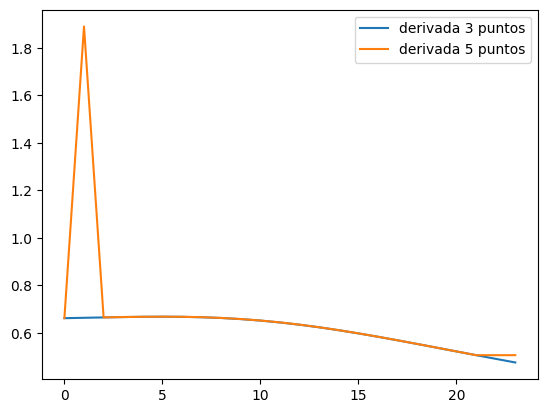

In [76]:
#Graficamos para ver las diferencias
plt.plot(dP_3, label = 'derivada 3 puntos')
plt.plot(dP_5, label = 'derivada 5 puntos')
plt.legend()

In [80]:
#Calculamos el error para cada dato
error = abs(dP_3-dP_5)/abs(dP_3)
error

array([1.19602711e-04, 1.85150498e+00, 2.99255770e-05, 1.01346386e-04,
       1.71542060e-04, 2.38021016e-04, 2.97900120e-04, 3.48179379e-04,
       3.86089124e-04, 4.09457758e-04, 4.17030550e-04, 4.08670675e-04,
       3.85395704e-04, 3.49240951e-04, 3.02982809e-04, 2.49785195e-04,
       1.92841968e-04, 1.35076865e-04, 7.89375523e-05, 2.62929140e-05,
       2.15793112e-05, 6.39394759e-05, 3.15330347e-02, 6.49010301e-02])

Como se puede apreciar tanto en el gráfico como en los datos de ambas derivadas, el error es mayor en los extremos de la curva. Por otro lado, en los valores de en medio el error se acerca a cero. 